In [9]:
import sys
import os

import torch 
torch.cuda.empty_cache()

sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../models'))
sys.path.append(os.path.abspath('../dataset_generation'))

from NN_TopOpt import SIMP_basic
from TopOpt import TopOptimizer2D
import yaml

methods = {
    "simp_basic": SIMP_basic,
}

In [8]:
# !apt-get install libglu1
# !apt-get install libxft2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libxft2
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 39.2 kB of archives.
After this operation, 121 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxft2 amd64 2.3.3-0ubuntu1 [39.2 kB]
Fetched 39.2 kB in 0s (147 kB/s) 
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package libxft2:amd64.
(Reading database ... 22229 files and directories currently installed.)
Preparing to unpack .../libxft2_2.3.3-0ubuntu1_amd64.deb ...
Unpacking libxft2:amd64 (2.3.3-0ubuntu1) ...
Setting up libxft2:amd64 (2.3.3-0ubuntu1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.14) ...


Info    : Reading '../test_problems/Brecket.msh'...
Info    : 13 entities
Info    : 5317 nodes
Info    : 10276 elements
Info    : Done reading '../test_problems/Brecket.msh'
Compute areas ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10276/10276 [00:00<00:00, 149393.14it/s]


Whole area 1.25


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10276/10276 [00:00<00:00, 20351.25it/s]


Fixed case:  fixed_xy [[0, 0.5], 1.5] 31 31
Loaded loads:  (30,)
check dv 0 0.7159863138385772
Build filter matrix ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10276/10276 [00:01<00:00, 9245.44it/s]


current volume:  0.3599851533118936
current c:  12139307.01201836
current volume:  0.3600381842590779
current c:  6136906.166339325
current volume:  0.3599038900085568
current c:  3703387.865479248
current volume:  0.3599343228852653
current c:  2539873.6992776776
current volume:  0.3598753210248285
current c:  1911892.1000341144
current volume:  0.3600213426173055
current c:  1623560.7056230966
current volume:  0.36001974343459525
current c:  1443581.7470655642
current volume:  0.3599677567203742
current c:  1328977.2438992255
current volume:  0.3600034973335108
current c:  1241430.1013864172
current volume:  0.3599395482794373
current c:  1179165.2273530336
current volume:  0.3599585669161639
current c:  1135323.8748798054
current volume:  0.3599807487964356
current c:  1100355.1147391985
current volume:  0.3599786043256129
current c:  1073042.2462537433
current volume:  0.36001886514978276
current c:  1053872.5851580454
current volume:  0.359979988873892
current c:  1040254.31343005

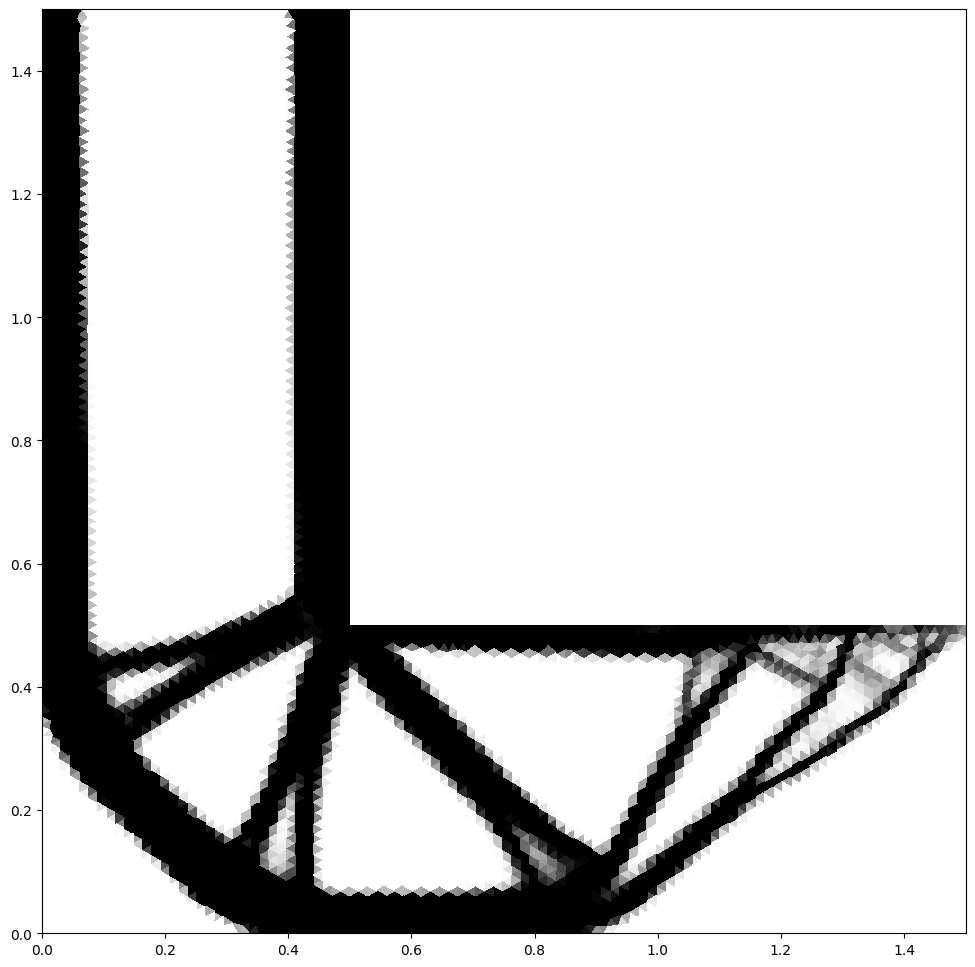

current volume:  0.35995047909895717
current c:  1007193.7159172485
current volume:  0.3600080251724855
current c:  1005271.4302819002
current volume:  0.3600367296672514
current c:  1003545.8634270283
current volume:  0.3599675531806255
current c:  1001907.2361229846
current volume:  0.3600353401156894
current c:  1000595.2949029375
current volume:  0.3600096504995498
current c:  999484.2367433566
current volume:  0.3599834283013202
current c:  999098.2617725482
current volume:  0.3600134665848602
current c:  998678.6248293858
current volume:  0.3600122565681372
current c:  998131.7036475098
current volume:  0.35996068333415837
current c:  997659.2778694292
current volume:  0.3600001626155881
current c:  997331.7431415187
current volume:  0.3600108478378565
current c:  996634.3995942913
current volume:  0.35996995186238956
current c:  996105.6917487843
current volume:  0.3600336172534092
current c:  995717.5538132128
current volume:  0.3599982043341977
current c:  994999.9381485623
cu

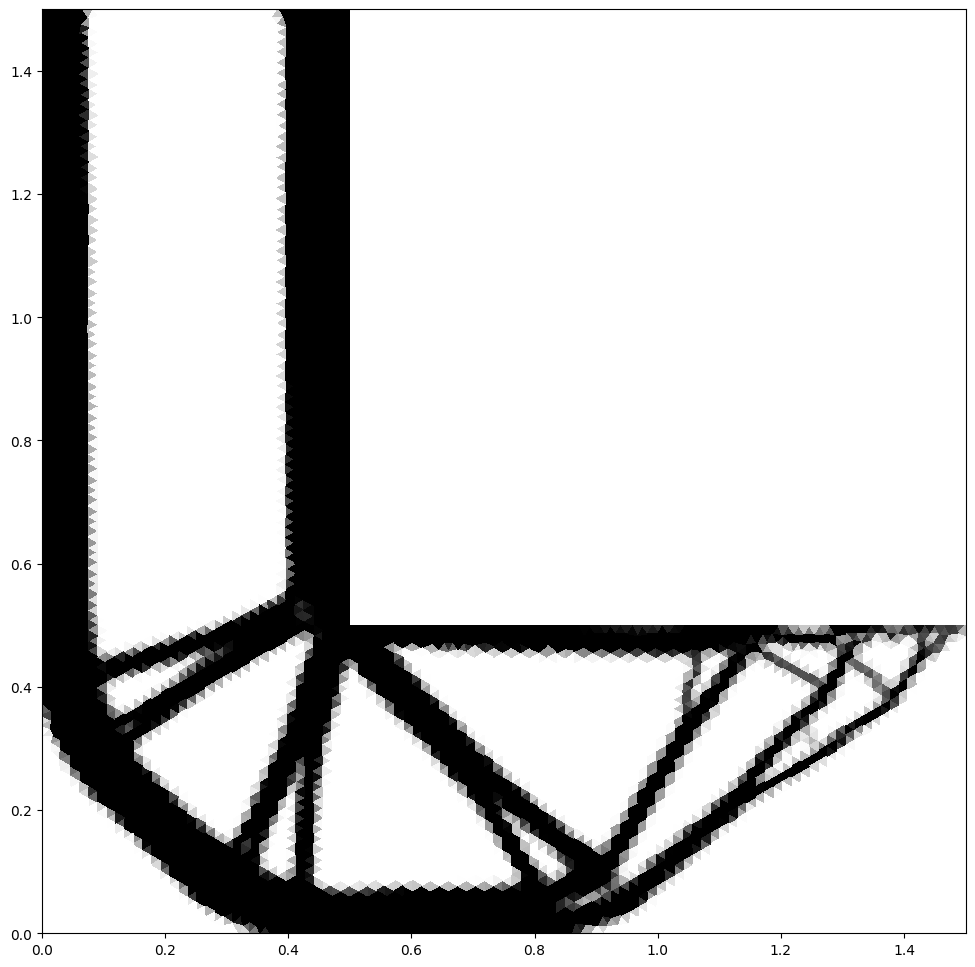

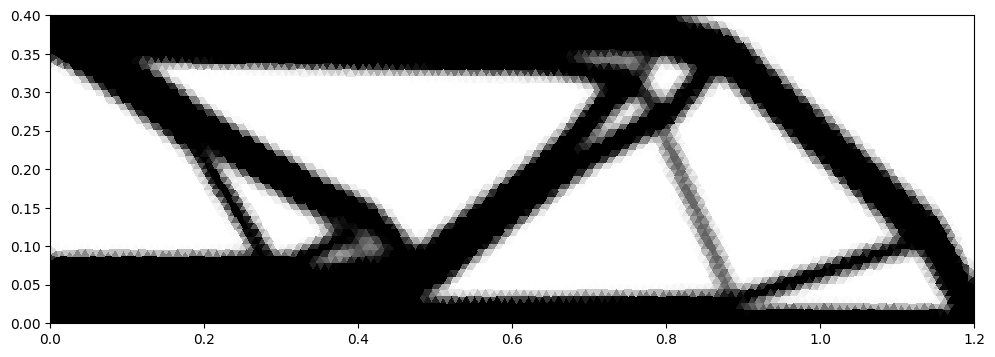

In [13]:
experiment_dir = "../configs/NN_top_optimization/SIMP_basic"

# select config
# config_name = "MBB_beam_half" 
# config_name = "Cant_beam"
# config_name = "Cant_beam_distrL"
config_name = "Brecket"

config_path = f"{experiment_dir}/{config_name}.yaml"

with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

params = config['params']
TopOptimizer = TopOptimizer2D(methods, params)
TopOptimizer.optimize(plot_interval=20)